## Convert mp4 to wav

In [1]:
#imports
import glob as glob 
import subprocess
import pathlib
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [2]:
# paths
ksounds_path = '/mnt/bdata/Data/bilal_data/ksounds/'
ksounds_wavpath = '/mnt/bdata/Data/bilal_data/ksounds_wav/'
ksounds_chromepath = '/mnt/bdata/Data/bilal_data/ksounds_chromagram/'

In [3]:
def showimage(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def show_audio(rep,path):
    plt.axis('off')
    if rep =='a1':
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(x, sr=sr)
        #print('a1:waveplot')
    else:
        img = mpimg.imread(path)
        plt.imshow(img)
        plt.show()

def get_specfilename(name,folder):
    name = name.split('.')[0]
    name =  name.split('/')[1].split('_')
    name = folder+'_'.join(name)+'.png'
    return name

In [4]:

def create_path(wav_filepath):
    path = wav_filepath.replace(wav_filepath.split('/')[-1],'')
    p = pathlib.Path(path)
    p.mkdir(parents=True, exist_ok=True)
    #print(path)



def gen_wav(src,dest):
    #print(src)
    command = "ffmpeg -i '"+src+"' -ab 160k -ac 2 -ar 44100 -vn '"+dest+"'"
    subprocess.call(command,shell=True)


In [5]:
def generate_wav():
    files = glob.glob(ksounds_path+'*/*/*.mp4')

    for f in files:
        mp4_filepath = f
        wav_filepath = mp4_filepath.split('ksounds')[0]+'ksounds_wav'+mp4_filepath.split('ksounds')[1].split('.')[0]+'.wav'
        #print(mp4_filepath)
        #print(wav_filepath)

        create_path(wav_filepath)
        gen_wav(mp4_filepath,wav_filepath)
    len(files)

In [6]:
mp4_files = glob.glob(ksounds_path+'*/*/*.mp4')
wav_files = glob.glob(ksounds_wavpath+'*/*/*.wav')


len(mp4_files), len(wav_files)

(20728, 15281)

## generate wav to chromagram

In [ ]:
def generate_chromagram():
    files = glob.glob(ksounds_wavpath+'*/*/*.wav')

    for f in files:
        mp4_filepath = f
        wav_filepath = mp4_filepath.split('ksounds')[0]+'ksounds_wav'+mp4_filepath.split('ksounds')[1].split('.')[0]+'.wav'
        #print(mp4_filepath)
        #print(wav_filepath)

        create_path(wav_filepath)
        gen_wav(mp4_filepath,wav_filepath)
    len(files)

<class 'numpy.ndarray'> <class 'int'> (441344,) 44100


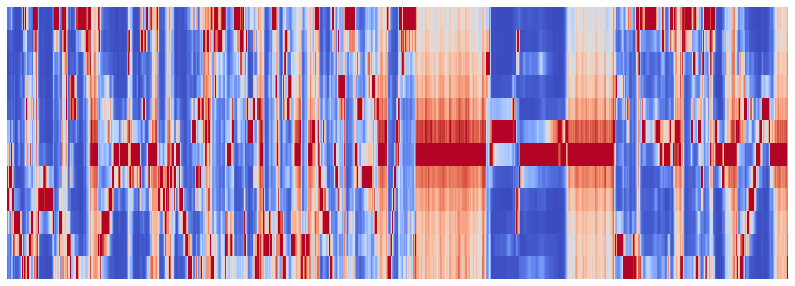

(None,
 '/mnt/bdata/Data/bilal_data/ksounds_chromagram_wav/videos_train/playing saxophone/q0nJyg4nMUU_000022_000032.png')

In [8]:
files = glob.glob(ksounds_wavpath+'*/*/*.wav')
audio = files[0]

x , sr = librosa.load(audio,sr=None)
print(type(x), type(sr),x.shape, sr)

%matplotlib inline


#a8
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(14, 5))
plt.axis('off')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
out = get_specfilename(audio,'a8/')
ch_filepath = wav_filepath.split('ksounds_wav')[0]+'ksounds_chromagram'+wav_filepath.split('ksounds')[1].split('.')[0]+'.png'
#out = 'a8/a8.png'
plt.show(),ch_filepath